In [2]:
import os
import pandas as pd
#import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# PARA USAR NO GOOGLE COLLAB:

# Link compartilhável do Google Drive para baixar o Dataset
#drive_url = 'https://drive.google.com/uc?id=14m-2aCSFKtjossZPNmrPMBjiao2KxnrO'
#gdown.download(drive_url, 'arquivo.csv')

###

path= os.path.join('..', 'data', 'arquivo.csv')

In [3]:
df= pd.read_csv(path)
df.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit",
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)
#Possíveis outliers
df= df[df['age'] >=18 ]
df= df[df['NumberOfTime30-59DaysPastDueNotWorse']<96  ]
df= df[df.iloc[:, 11]<15]

df.dropna(inplace=True)
df_x= df.drop(['SeriousDlqin2yrs', 'ID'], axis=1)
df_y= df["SeriousDlqin2yrs"]

df_x.head()

,balance_divided_creditlimit,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### **Sample distruibution**

<Axes: xlabel='age', ylabel='Density'>

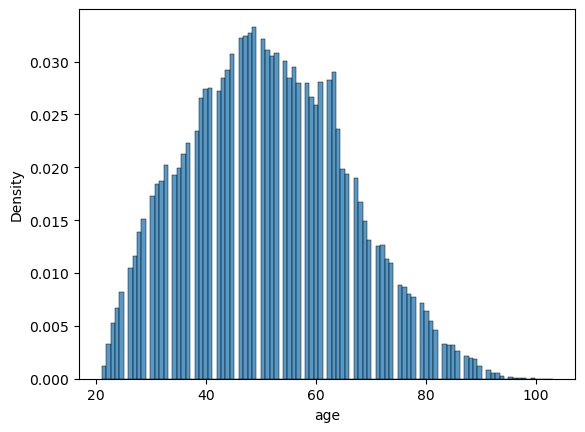

In [4]:
media_populacao = df['age'].mean()
desvio_populacao = df['age'].std()

dados_artificiais = np.random.normal(loc=media_populacao, scale=desvio_populacao, size=1000)
#dados_artificiais, media, desvio
plt.Figure([10,5])
sns.histplot(df['age'], stat='density', label='dados reais')


### **Sampling distribution**

In [ ]:
dt= df['age']
sample_size= 30   #num qtd em cada amostra
num_samples= 100  #num amostras

media_samples= []
sample_z = []

for i in range(num_samples):
  sample= dt.sample(sample_size)
  media_samples.append(sample.mean())

  z_score= (media_populacao - sample.mean())/(desvio_populacao/np.sqrt(sample_size))
  sample_z.append(z_score)


plt.Figure([10,5])
sns.histplot(media_samples, kde=True, stat='density', bins=20)
plt.xlabel(f"Média dos samples: {np.mean(media_samples):.2f}")

